In [113]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [114]:
data = pd.read_csv('Virat Kohli - One Day Internationals - Performance Analysis by Year - Sheet1.csv')

In [115]:
data

,Year,Mat,Inns,NO,100s,50s,0s,HS,Runs,Avg,S/R,Ca,St
0,2008,5,5,0,0,1,0,54,159,31.80,66.53,3,0
1,2009,10,8,2,1,2,0,107,325,54.17,84.42,4,0
2,2010,25,24,3,3,7,3,118,995,47.38,85.12,9,0
3,2011,34,34,5,4,8,2,117,1381,47.62,85.56,19,0
4,2012,17,17,2,5,3,1,183,1026,68.40,93.78,14,0
5,2013,34,30,6,4,7,3,115*,1268,52.83,97.54,11,0
6,2014,21,20,2,4,5,1,139*,1054,58.56,99.62,8,0
7,2015,20,20,3,2,1,0,138,623,36.65,80.60,11,0
8,2016,10,10,2,3,4,0,154*,739,92.38,100.00,6,0
9,2017,26,26,7,6,7,2,131,1460,76.84,99.12,9,0


In [116]:
df = data[:-1]

In [117]:
df

,Year,Mat,Inns,NO,100s,50s,0s,HS,Runs,Avg,S/R,Ca,St
0,2008,5,5,0,0,1,0,54,159,31.80,66.53,3,0
1,2009,10,8,2,1,2,0,107,325,54.17,84.42,4,0
2,2010,25,24,3,3,7,3,118,995,47.38,85.12,9,0
3,2011,34,34,5,4,8,2,117,1381,47.62,85.56,19,0
4,2012,17,17,2,5,3,1,183,1026,68.40,93.78,14,0
5,2013,34,30,6,4,7,3,115*,1268,52.83,97.54,11,0
6,2014,21,20,2,4,5,1,139*,1054,58.56,99.62,8,0
7,2015,20,20,3,2,1,0,138,623,36.65,80.60,11,0
8,2016,10,10,2,3,4,0,154*,739,92.38,100.00,6,0
9,2017,26,26,7,6,7,2,131,1460,76.84,99.12,9,0


In [118]:
# extract number from HS column
df['HS'] = df.HS.str.extract('(\d+)')

<ipython-input-118-39eda2178d83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HS'] = df.HS.str.extract('(\d+)')


In [119]:
df

,Year,Mat,Inns,NO,100s,50s,0s,HS,Runs,Avg,S/R,Ca,St
0,2008,5,5,0,0,1,0,54,159,31.80,66.53,3,0
1,2009,10,8,2,1,2,0,107,325,54.17,84.42,4,0
2,2010,25,24,3,3,7,3,118,995,47.38,85.12,9,0
3,2011,34,34,5,4,8,2,117,1381,47.62,85.56,19,0
4,2012,17,17,2,5,3,1,183,1026,68.40,93.78,14,0
5,2013,34,30,6,4,7,3,115,1268,52.83,97.54,11,0
6,2014,21,20,2,4,5,1,139,1054,58.56,99.62,8,0
7,2015,20,20,3,2,1,0,138,623,36.65,80.60,11,0
8,2016,10,10,2,3,4,0,154,739,92.38,100.00,6,0
9,2017,26,26,7,6,7,2,131,1460,76.84,99.12,9,0


In [120]:
# create data frame with needed columns
df = df[['Year', 'Avg', '100s', '50s', '0s', 'HS', 'S/R']]

In [121]:
df['Year'] = pd.to_datetime(df['Year'])

<ipython-input-121-6849e2a294cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'])


In [122]:
df = df.rename(columns={'Avg': 'y', 'Year': 'ds'})

In [123]:
df['y_orig'] = df['y'] # to save a copy of the original data.
df['y'] = np.log(df['y'])

In [124]:
df

,ds,y,100s,50s,0s,HS,S/R,y_orig
0,2008-01-01,3.459466,0,1,0,54,66.53,31.80
1,2009-01-01,3.992127,1,2,0,107,84.42,54.17
2,2010-01-01,3.858200,3,7,3,118,85.12,47.38
3,2011-01-01,3.863253,4,8,2,117,85.56,47.62
4,2012-01-01,4.225373,5,3,1,183,93.78,68.40
5,2013-01-01,3.967079,4,7,3,115,97.54,52.83
6,2014-01-01,4.070052,4,5,1,139,99.62,58.56
7,2015-01-01,3.601413,2,1,0,138,80.60,36.65
8,2016-01-01,4.525911,3,4,0,154,100.00,92.38
9,2017-01-01,4.341725,6,7,2,131,99.12,76.84


In [125]:
model = Prophet()
model.add_regressor('100s')
model.add_regressor('50s')
model.add_regressor('0s')
model.add_regressor('HS')
model.add_regressor('S/R')

In [126]:
model.fit(df)
future_data = model.make_future_dataframe(periods=1, freq='Y')

21:04:24 - cmdstanpy - INFO - Chain [1] start processing
21:04:24 - cmdstanpy - INFO - Chain [1] done processing


In [127]:
future_data.tail(5)

,ds
11,2019-01-01
12,2020-01-01
13,2021-01-01
14,2022-01-01
15,2022-12-31


In [128]:
forecast_data = model.predict(future_data)

ValueError: Regressor '100s' missing from dataframe

In [129]:
#changing future_data 
future_data=df[['ds', '100s', '50s', '0s', 'HS', 'S/R']]

In [130]:
future_data

,ds,100s,50s,0s,HS,S/R
0,2008-01-01,0,1,0,54,66.53
1,2009-01-01,1,2,0,107,84.42
2,2010-01-01,3,7,3,118,85.12
3,2011-01-01,4,8,2,117,85.56
4,2012-01-01,5,3,1,183,93.78
5,2013-01-01,4,7,3,115,97.54
6,2014-01-01,4,5,1,139,99.62
7,2015-01-01,2,1,0,138,80.60
8,2016-01-01,3,4,0,154,100.00
9,2017-01-01,6,7,2,131,99.12


In [132]:
forecast_data = model.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
10,2018-01-01,4.658419,4.487956,4.818280
11,2019-01-01,4.225807,4.051191,4.381043
12,2020-01-01,3.853737,3.681580,4.033930
13,2021-01-01,3.710143,3.547926,3.880900
14,2022-01-01,3.332928,3.160925,3.489645


In [133]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,0s,0s_lower,0s_upper,100s,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-01,1.959274,3.281508,3.623499,1.959274,1.959274,0.172056,0.172056,0.172056,-0.276836,...,-0.731703,-0.731703,-0.731703,2.227242,2.227242,2.227242,0.0,0.0,0.0,3.454814
1,2009-01-01,1.931575,3.839667,4.182978,1.931575,1.931575,0.172056,0.172056,0.172056,-0.182460,...,-0.174504,-0.174504,-0.174504,2.251056,2.251056,2.251056,0.0,0.0,0.0,4.008127
2,2010-01-01,1.903953,3.451098,3.772097,1.903953,1.903953,-0.344112,-0.344112,-0.344112,0.006292,...,-0.494544,-0.494544,-0.494544,2.206243,2.206243,2.206243,0.0,0.0,0.0,3.615652
3,2011-01-01,1.876330,3.704870,4.041326,1.876330,1.876330,-0.172056,-0.172056,-0.172056,0.100668,...,-0.212881,-0.212881,-0.212881,2.198295,2.198295,2.198295,0.0,0.0,0.0,3.861744
4,2012-01-01,1.848707,4.110641,4.432962,1.848707,1.848707,0.000000,0.000000,0.000000,0.195043,...,0.202463,0.202463,0.202463,2.227242,2.227242,2.227242,0.0,0.0,0.0,4.278412
5,2013-01-01,1.821017,3.871144,4.211851,1.821017,1.821017,-0.344112,-0.344112,-0.344112,0.100668,...,-0.020775,-0.020775,-0.020775,2.251056,2.251056,2.251056,0.0,0.0,0.0,4.051298
6,2014-01-01,1.793560,4.184776,4.518097,1.793560,1.793560,0.000000,0.000000,0.000000,0.100668,...,0.349953,0.349953,0.349953,2.206243,2.206243,2.206243,0.0,0.0,0.0,4.349756
7,2015-01-01,1.766292,3.545755,3.897108,1.766292,1.766292,0.172056,0.172056,0.172056,-0.088084,...,-0.241445,-0.241445,-0.241445,2.198295,2.198295,2.198295,0.0,0.0,0.0,3.723142
8,2016-01-01,1.739030,4.219286,4.551763,1.739030,1.739030,0.172056,0.172056,0.172056,0.006292,...,0.416610,0.416610,0.416610,2.227242,2.227242,2.227242,0.0,0.0,0.0,4.382882
9,2017-01-01,1.711693,4.159994,4.494757,1.711693,1.711693,-0.172056,-0.172056,-0.172056,0.289419,...,0.364251,0.364251,0.364251,2.251056,2.251056,2.251056,0.0,0.0,0.0,4.327000


C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


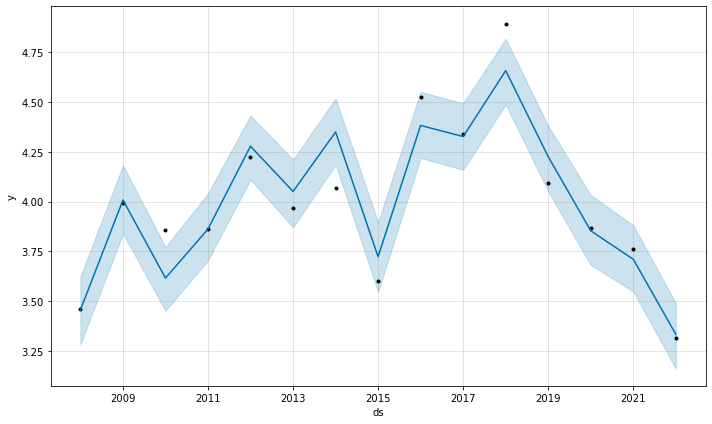

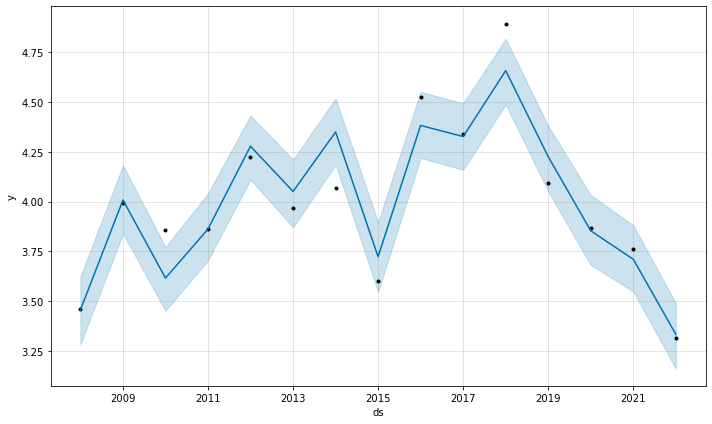

In [135]:
model.plot(forecast_data)

C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


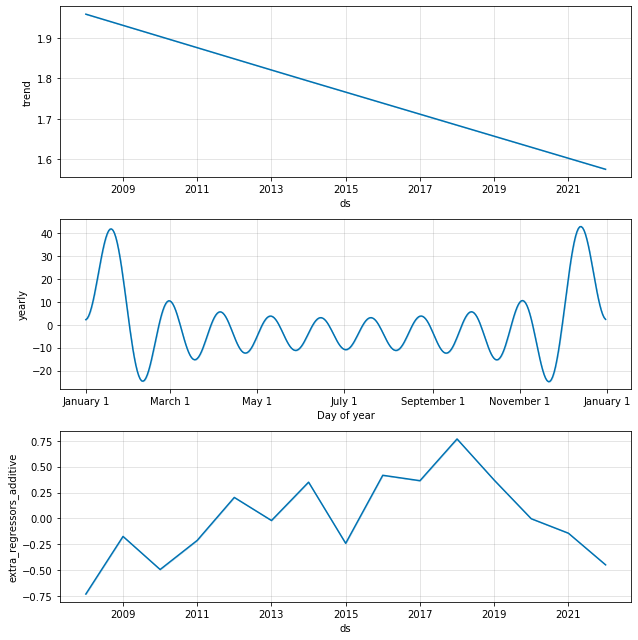

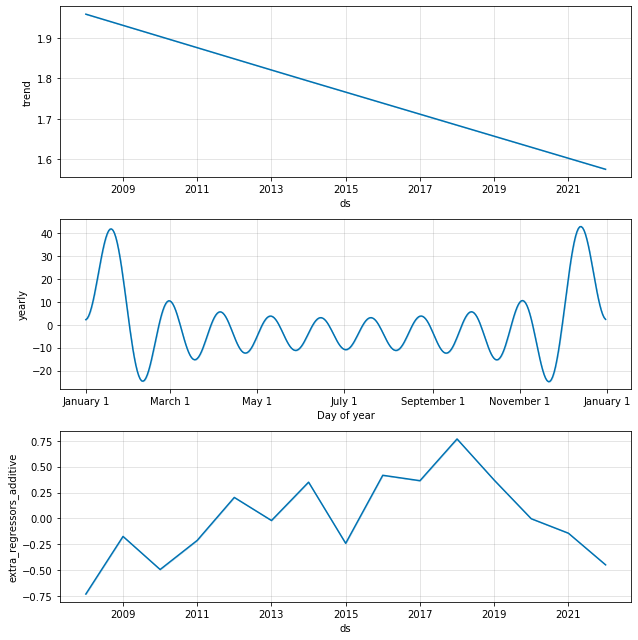

In [136]:
model.plot_components(forecast_data)

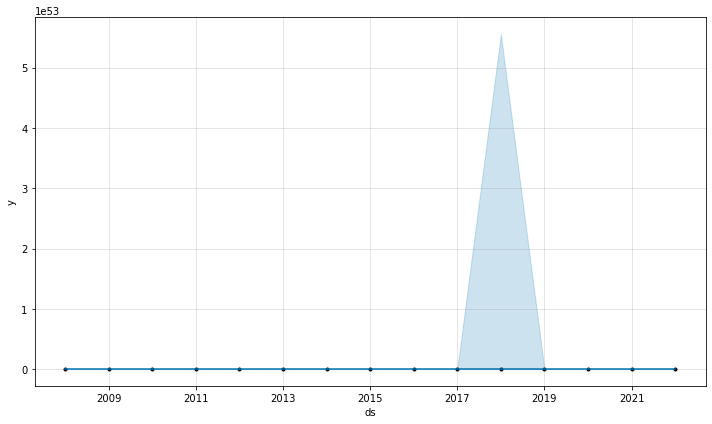

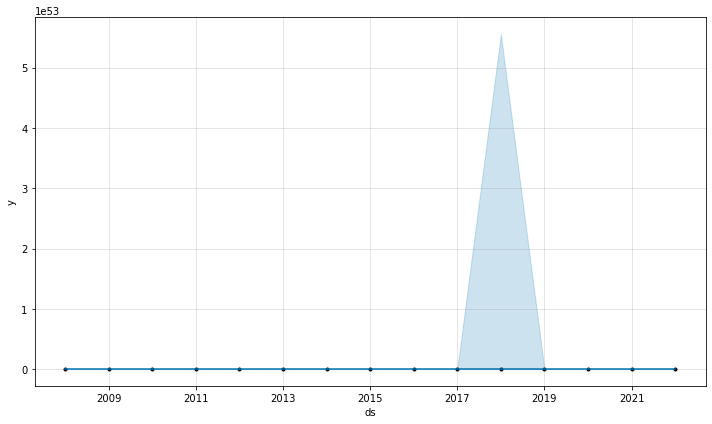

In [138]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model.plot(forecast_data_orig)

In [139]:
df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_orig']

In [142]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'